# Project 1 
## Description: Systematic roll up of annotation terms from a broad set of sources.

The planned outcome is a method to classify/aggregate terms for end-users in a systematic, explainable, and defensible way. The intention is to help end-users when they are ask, “what does your platform cover?”. That is a complex question that depends on what is of interest to the users and the context of the question but providing a list of 7000 features with some annotation or links is not a satisfying answer.

## Outcome
The ideal outcome is to be able to respond to a user: ‘What is your primary area of interest?’ then go to a high-level classification of terms related to the user’s interest and approach to proteomics (and be able to drill down from that high level).

In [1]:
pip install sentence_transformers

Note: you may need to restart the kernel to use updated packages.


In [2]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

In [3]:
#import required libraries
#import os
import pandas as pd

#1. Preprocess the GO Biological Process Data 

In [6]:
pwd

'/Users/raymondotoo/Desktop/Dropbox/SomaLogic/Project1'

In [7]:
#This file contains all of the GO biological process annotatations.  Some are missing GO ID's,these exist in UniProt but are depricated in GO. 
#There is a need to curate and update these annotations. Each row consists of a single GO annotation, its go id, the type of relationship it has to its parent term(s), and a pipe '|' delimited list of parent GO Id's 
GO_BiologicalProcess_GO_Relationships_20220615 = pd.read_csv('GO_BiologicalProcess_GO_Relationships_20220615.csv')
GO_BiologicalProcess_GO_Relationships_20220615

,go_name,go_id,rel_type,parent_terms
0,coenzyme biosynthetic process,NaN,NaN,NaN
1,evasion or tolerance by symbiont of host-produ...,NaN,NaN,NaN
2,evasion or tolerance by symbiont of host-produ...,NaN,NaN,NaN
3,entry of bacterium into host cell,GO:0035635,INSTANCE_OF,NaN
4,entry into host cell,NaN,NaN,NaN
...,...,...,...,...
29196,gliotoxin biosynthetic process,GO:2001310,IS_A,GO:0044272|GO:0018130|GO:1901605|GO:2001308|GO...
29197,6-sulfoquinovose(1-) catabolic process to glyc...,GO:0061720,IS_A,GO:0006796|GO:0006081|GO:0019637|GO:1902652|GO...
29198,novobiocin biosynthetic process,GO:0043642,IS_A,GO:1901566|GO:0017000|GO:1901503|GO:0043604|GO...
29199,doxorubicin metabolic process,GO:0044598,IS_A,GO:0006725|GO:0006807|GO:1901661|GO:1901360|GO...


In [8]:
#Using main list of GO terms
GO_BiologicalProcess_GO_Relationships_20220615

,go_name,go_id,rel_type,parent_terms
0,coenzyme biosynthetic process,NaN,NaN,NaN
1,evasion or tolerance by symbiont of host-produ...,NaN,NaN,NaN
2,evasion or tolerance by symbiont of host-produ...,NaN,NaN,NaN
3,entry of bacterium into host cell,GO:0035635,INSTANCE_OF,NaN
4,entry into host cell,NaN,NaN,NaN
...,...,...,...,...
29196,gliotoxin biosynthetic process,GO:2001310,IS_A,GO:0044272|GO:0018130|GO:1901605|GO:2001308|GO...
29197,6-sulfoquinovose(1-) catabolic process to glyc...,GO:0061720,IS_A,GO:0006796|GO:0006081|GO:0019637|GO:1902652|GO...
29198,novobiocin biosynthetic process,GO:0043642,IS_A,GO:1901566|GO:0017000|GO:1901503|GO:0043604|GO...
29199,doxorubicin metabolic process,GO:0044598,IS_A,GO:0006725|GO:0006807|GO:1901661|GO:1901360|GO...


In [10]:
#convert the GO terms to a list
GO_terms_list = GO_BiologicalProcess_GO_Relationships_20220615['go_name'].tolist()
GO_terms_list

['coenzyme biosynthetic process',
 'evasion or tolerance by symbiont of host-produced reactive oxygen species',
 'evasion or tolerance by symbiont of host-produced nitric oxide',
 'entry of bacterium into host cell',
 'entry into host cell',
 'viral entry into host cell',
 'active induction of host immune response by virus',
 '2-oxoglutarate metabolic process',
 'porphyrin-containing compound metabolic process',
 'biological_process',
 'maternal determination of dorsal/ventral axis',
 'maternal determination of dorsal/ventral axis',
 'mesodermal cell migration',
 'axo-dendritic transport',
 'anterograde axonal transport',
 'retrograde axonal transport',
 'metabolic process',
 'actin polymerization or depolymerization',
 'glucocorticoid metabolic process',
 'protein alkylation',
 'protein dealkylation',
 'spermine metabolic process',
 'spermidine metabolic process',
 'regulation of blood pressure',
 'bioluminescence',
 'cell death',
 'opsonization',
 'head involution',
 'regulation of G

In [13]:
embedder = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')

# 2. Cluster the GO terms into the most similar terms using some pretrained models as a starting point for the clustering. A more specific model could be trained as need be should the available pretrained models perform poorly as per the context in question.

In [14]:
 #Took about 12 mins to run when ran on colab's server.
corpus_embeddings = embedder.encode(GO_terms_list)

In [15]:
from sklearn.cluster import KMeans
num_clusters = 10

# Define kmeans model
clustering_model = KMeans(n_clusters=num_clusters)

In [16]:
# Fit the embedding with kmeans clustering.
clustering_model.fit(corpus_embeddings)
# Get the cluster id assigned to each GO term.
cluster_assignment = clustering_model.labels_

In [17]:
print(cluster_assignment)

[7 0 0 ... 3 0 3]


In [18]:
clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(GO_terms_list[sentence_id])

#loop through the cluster and print each clustered along with its assigned term as suggested by the model
for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")

Cluster  1
['evasion or tolerance by symbiont of host-produced reactive oxygen species', 'evasion or tolerance by symbiont of host-produced nitric oxide', 'porphyrin-containing compound metabolic process', 'metabolic process', 'glucocorticoid metabolic process', 'spermine metabolic process', 'respiratory chain complex IV assembly', 'guanosine metabolic process', 'carbohydrate transport', 'aerobic respiration', 'homoserine metabolic process', 'nucleotide metabolic process', 'nucleoside monophosphate metabolic process', 'purine nucleoside monophosphate metabolic process', 'nucleoside diphosphate metabolic process', 'purine nucleoside diphosphate metabolic process', 'nucleoside triphosphate metabolic process', 'purine nucleoside triphosphate metabolic process', 'pyrimidine nucleoside triphosphate metabolic process', 'cyclic nucleotide metabolic process', 'menaquinone metabolic process', 'siderophore metabolic process', 'response to pH', 'amine metabolic process', 'oligosaccharide metaboli

In [19]:
#GO_clusters = pd.DataFrame(clustered_sentences)
#Transpose to convert the rows to columns and vice versa
GO_clusters = pd.DataFrame(clustered_sentences).transpose()
#final_GO_clusters

#Rename the columns by adding cluster prefix to the column names
final_GO_clusters = GO_clusters.add_prefix("cluster_")
final_GO_clusters

,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9
0,evasion or tolerance by symbiont of host-produ...,regulation of blood pressure,regulation of G protein-coupled receptor signa...,retrograde axonal transport,negative gravitropism,biological_process,regulation of smoothened signaling pathway,coenzyme biosynthetic process,entry of bacterium into host cell,mesodermal cell migration
1,evasion or tolerance by symbiont of host-produ...,light-induced release of internally sequestere...,gurken signaling pathway,actin polymerization or depolymerization,negative regulation of epidermal growth factor...,maternal determination of dorsal/ventral axis,soluble molecule recognition,2-oxoglutarate metabolic process,entry into host cell,axo-dendritic transport
2,porphyrin-containing compound metabolic process,circadian rhythm,regulation of Wnt signaling pathway,protein alkylation,negative regulation of axonogenesis,maternal determination of dorsal/ventral axis,brassinosteroid homeostasis,7-methylguanosine metabolic process,viral entry into host cell,cell death
3,metabolic process,blood coagulation,regulation of Toll signaling pathway,protein dealkylation,negative regulation of cysteine-type endopepti...,anterograde axonal transport,positive regulation of axonogenesis,glutamine family amino acid metabolic process,active induction of host immune response by virus,cell population proliferation
4,glucocorticoid metabolic process,blood coagulation,regulation of Notch signaling pathway,larval chitin-based cuticle development,negative regulation of Notch signaling pathway,spermidine metabolic process,positive regulation of neurotrophin TRK recept...,aspartate family amino acid metabolic process,pathogenesis,glial cell migration
...,...,...,...,...,...,...,...,...,...,...
4058,None,None,None,None,None,None,None,terrequinone A biosynthetic process,None,None
4059,None,None,None,None,None,None,None,leukotriene A4 catabolic process,None,None
4060,None,None,None,None,None,None,None,leukotriene A4 biosynthetic process,None,None
4061,None,None,None,None,None,None,None,verruculogen biosynthetic process,None,None


In [20]:
#View the number of terms assigned to each cluster(category)
final_GO_clusters.count()

cluster_0    2386
cluster_1    1429
cluster_2    3221
cluster_3    3353
cluster_4    3227
cluster_5    4016
cluster_6    2843
cluster_7    4063
cluster_8    1469
cluster_9    3194
dtype: int64

<AxesSubplot:title={'center':'GO Biological Processes Main Categories'}>

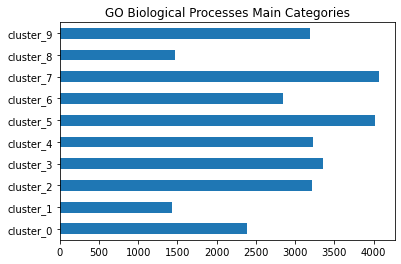

In [21]:
#Counts the non-na entries in the dataframe and columns 
final_GO_clusters.count().plot(kind='barh',title='GO Biological Processes Main Categories')

# 2. To tag each of the clusters, the most representative keyword /keyphrase can be used, modeling the data to suit the keyBERT model. KeyBERT model can be found here: https://github.com/MaartenGr/KeyBERT

In [22]:
from pandas.core.frame import DataFrame
#First extract unique description for each column
cu = []
i = []
for cn in final_GO_clusters.columns[:num_clusters]:
    cu.append(final_GO_clusters[cn].unique())
    i.append(cn)

pd.DataFrame( cu, index=i).T

,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9
0,evasion or tolerance by symbiont of host-produ...,regulation of blood pressure,regulation of G protein-coupled receptor signa...,retrograde axonal transport,negative gravitropism,biological_process,regulation of smoothened signaling pathway,coenzyme biosynthetic process,entry of bacterium into host cell,mesodermal cell migration
1,evasion or tolerance by symbiont of host-produ...,light-induced release of internally sequestere...,gurken signaling pathway,actin polymerization or depolymerization,negative regulation of epidermal growth factor...,maternal determination of dorsal/ventral axis,soluble molecule recognition,2-oxoglutarate metabolic process,entry into host cell,axo-dendritic transport
2,porphyrin-containing compound metabolic process,circadian rhythm,regulation of Wnt signaling pathway,protein alkylation,negative regulation of axonogenesis,anterograde axonal transport,brassinosteroid homeostasis,7-methylguanosine metabolic process,viral entry into host cell,cell death
3,metabolic process,blood coagulation,regulation of Toll signaling pathway,protein dealkylation,negative regulation of cysteine-type endopepti...,spermidine metabolic process,positive regulation of axonogenesis,glutamine family amino acid metabolic process,active induction of host immune response by virus,cell population proliferation
4,glucocorticoid metabolic process,muscle contraction,regulation of Notch signaling pathway,larval chitin-based cuticle development,negative regulation of Notch signaling pathway,bioluminescence,positive regulation of neurotrophin TRK recept...,aspartate family amino acid metabolic process,pathogenesis,glial cell migration
...,...,...,...,...,...,...,...,...,...,...
3954,None,None,None,None,None,None,None,terrequinone A biosynthetic process,None,None
3955,None,None,None,None,None,None,None,leukotriene A4 catabolic process,None,None
3956,None,None,None,None,None,None,None,leukotriene A4 biosynthetic process,None,None
3957,None,None,None,None,None,None,None,verruculogen biosynthetic process,None,None


In [23]:
final_GO_clusters.count()

cluster_0    2386
cluster_1    1429
cluster_2    3221
cluster_3    3353
cluster_4    3227
cluster_5    4016
cluster_6    2843
cluster_7    4063
cluster_8    1469
cluster_9    3194
dtype: int64

In [24]:
doc = final_GO_clusters['cluster_0'].str.cat(sep='')

In [25]:
pip install keybert

  Created wheel for keybert: filename=keybert-0.5.1-py3-none-any.whl size=21322 sha256=693b3cbe27dca643d23a0d0824aa326b4444268c4d5f8691937935413de1c841
  Stored in directory: /Users/raymondotoo/Library/Caches/pip/wheels/9a/87/f1/df34ecbb9cd676df6a75511bf922e99bce7d21956a2e0af5ab
Successfully built keybert
Note: you may need to restart the kernel to use updated packages.


In [26]:
from keybert import KeyBERT

In [27]:
kw_model = KeyBERT()
kw_model.extract_keywords(doc, keyphrase_ngram_range=(1,3))

[('metabolic processresponse organophosphorusresponse', 0.5992),
 ('processnylon metabolic processresponse', 0.5961),
 ('metabolic processresponse', 0.5831),
 ('processfructan metabolic processresponse', 0.5765),
 ('processpantothenate metabolic processbile', 0.5659)]

## a. Using Max Sum Similarity

In [28]:
#Test model with one column/cluster
kw_model.extract_keywords(doc, keyphrase_ngram_range=(1,3), 
                          stop_words='english', 
                          use_maxsum=True,
                          top_n=5)

[('metabolic processdetection chemical', 0.5517),
 ('processoxaloacetate metabolic processmalate', 0.5542),
 ('processmacrolide metabolic processresponse', 0.5549),
 ('species metabolic processresponse', 0.5645),
 ('metabolic processresponse organophosphorusresponse', 0.5992)]

In [30]:
#Run model on all the
doc_1 = final_GO_clusters['cluster_0'].str.cat(sep='')
doc_2 = final_GO_clusters['cluster_1'].str.cat(sep='')
doc_3 = final_GO_clusters['cluster_2'].str.cat(sep='')
doc_4 = final_GO_clusters['cluster_3'].str.cat(sep='')
doc_5 = final_GO_clusters['cluster_4'].str.cat(sep='')
doc_6= final_GO_clusters['cluster_5'].str.cat(sep='')
doc_7 = final_GO_clusters['cluster_6'].str.cat(sep='')
doc_8 = final_GO_clusters['cluster_7'].str.cat(sep='')
doc_9 = final_GO_clusters['cluster_8'].str.cat(sep='')
doc_10= final_GO_clusters['cluster_9'].str.cat(sep='')

clust_docs=[doc_1,doc_2,doc_3, doc_4, doc_5,doc_6,doc_7,doc_8,doc_9,doc_10]
clust_key = []
a = 0

for i in clust_docs:
  
  j = kw_model.extract_keywords(clust_docs[a], keyphrase_ngram_range=(1,3), 
                          stop_words='english', 
                          use_maxsum=True,
                          top_n=5)
  a=a+1
  clust_key.append(j)
  


In [31]:
clust_key

[[('metabolic processdetection chemical', 0.5517),
  ('processoxaloacetate metabolic processmalate', 0.5542),
  ('processmacrolide metabolic processresponse', 0.5549),
  ('species metabolic processresponse', 0.5645),
  ('metabolic processresponse organophosphorusresponse', 0.5992)],
 [('transportregulation muscle contractionsmooth', 0.4127),
  ('electrical stimulusregulation calcium', 0.4155),
  ('circulationregulation heart contractionestablishment', 0.4166),
  ('contractionresponse muscle activityregulation', 0.4197),
  ('heart processcellular calcium', 0.4708)],
 [('signaling pathway death', 0.5304),
  ('signaling pathwayregulation cytokine', 0.5378),
  ('toll signaling pathwayregulation', 0.5577),
  ('pathwayregulation notch signaling', 0.5652),
  ('signalingregulation oxidative stress', 0.5853)],
 [('dna nucleotidylexotransferase activityfolate', 0.5186),
  ('metabolic processdna damage', 0.5211),
  ('polyadenylationhistone biotinylationdna replication', 0.5252),
  ('repairregulat

In [32]:
#clust_key
maxSum_Similarity = pd.DataFrame(clust_key)
maxSum_Similarity


,0,1,2,3,4
0,"(metabolic processdetection chemical, 0.5517)","(processoxaloacetate metabolic processmalate, ...","(processmacrolide metabolic processresponse, 0...","(species metabolic processresponse, 0.5645)",(metabolic processresponse organophosphorusres...
1,"(transportregulation muscle contractionsmooth,...","(electrical stimulusregulation calcium, 0.4155)",(circulationregulation heart contractionestabl...,(contractionresponse muscle activityregulation...,"(heart processcellular calcium, 0.4708)"
2,"(signaling pathway death, 0.5304)","(signaling pathwayregulation cytokine, 0.5378)","(toll signaling pathwayregulation, 0.5577)","(pathwayregulation notch signaling, 0.5652)","(signalingregulation oxidative stress, 0.5853)"
3,"(dna nucleotidylexotransferase activityfolate,...","(metabolic processdna damage, 0.5211)",(polyadenylationhistone biotinylationdna repli...,"(repairregulation mitochondrial translational,...","(mitochondrial transcriptionproduction sirna, ..."
4,"(apoptosisnegative regulation, 0.5686)",(pathwaynegative regulation axonogenesisnegati...,"(specific transcriptionnegative regulation, 0....","(cell sizenegative regulation, 0.5756)","(notch signaling pathwaynegative, 0.6204)"
5,"(ventral axismaternal determination, 0.4817)","(olivary nucleus maturationintermediate, 0.4863)",(morphogenesisrandom inactivation chromosomein...,"(gonad developmentfemale gonad, 0.499)",(formationeye developmenturogenital developmen...
6,"(mitosispositive regulation transcription, 0.5...","(regulation kappab phosphorylationpositive, 0....","(viral transcriptionpositive regulation, 0.5589)","(regulation kinase activitypositive, 0.5668)","(signalingpositive regulation ras, 0.5991)"
7,(triphosphate metabolic processdeoxyribonucleo...,(processdeoxyribonucleotide biosynthetic proce...,"(metabolic processergothioneine biosynthesis, ...","(compound metabolic processresponse, 0.5428)",(processribonucleoside monophosphate biosynthe...
8,(stimulusresponse virusresponse bacteriumrespo...,"(host cell virusfungal, 0.5606)",(viruspathogenesisresponse xenobiotic stimulus...,"(host cellresponse bacteriocinregulation, 0.5651)","(membraneviral entry host, 0.587)"
9,"(differentiationstem cell developmentstem, 0.5...",(morphogenesisneural tissue regenerationextrac...,(morphogenesiscellular developmental processce...,"(biogenesisstem cell, 0.5236)","(tissue developmentcell migration, 0.5251)"


## b. Using Maximal Marginal Relevance

In [33]:
#Test model with one cluster
kw_model.extract_keywords(doc, keyphrase_ngram_range=(1,3), 
                          stop_words='english', 
                          use_mmr=True,
                          nr_candidates=20)

[('metabolic processresponse organophosphorusresponse', 0.5992),
 ('evasion tolerance', 0.1613),
 ('reactive oxygen species', 0.2795),
 ('processdetoxification zinc', 0.3607),
 ('patterningcell', 0.1366)]

In [34]:
#run model on all the clusters
clust_key_mmr = []
b=0
for i in clust_docs:
  
  k = kw_model.extract_keywords(clust_docs[b], keyphrase_ngram_range=(1,3), 
                          stop_words='english', 
                          use_mmr=True,
                          nr_candidates=20)
  b=b+1
  clust_key_mmr.append(k)

In [35]:
#clust_key
Maximal_Marginal_Relevance = pd.DataFrame(clust_key_mmr)
Maximal_Marginal_Relevance

,0,1,2,3,4
0,(metabolic processresponse organophosphorusres...,"(evasion tolerance, 0.1613)","(reactive oxygen species, 0.2795)","(processdetoxification zinc, 0.3607)","(patterningcell, 0.1366)"
1,"(circulationpositive regulation calcium, 0.4831)","(developmentcell migration, 0.0947)","(detection mechanical stimulus, 0.1988)","(developmentsomatic muscle developmentadult, 0...","(heart contractionestablishment, 0.3043)"
2,"(signaling pathwayregulation toll, 0.6083)","(gibberellic acid mediated, 0.3363)","(oxidative stressregulation glycolytic, 0.4642)","(signaling pathwaydetection auxin, 0.4761)","(activityactivation jun kinase, 0.4055)"
3,(methylationdna repairprotein processingproton...,(mitochondrionbilirubin conjugationmitochondri...,"(species metabolic process, 0.3154)",(mediated transformationsnrna transcriptionrrn...,"(dna bindingcapsorubin metabolic, 0.4715)"
4,"(pathwaynegative regulation notch, 0.6226)","(cell growth, 0.3271)","(rna polymerase activitynegative, 0.4408)","(cytotoxicitynegative regulation cytokine, 0.4...",(exocytosis neurotransmitternegative regulatio...
5,"(morphogenesismale gonad developmentfemale, 0....","(cell divisionmaternal determination, 0.4147)","(stimulusdetection uvresponse mechanical, 0.2134)","(lightregulation seed dormancy, 0.3714)","(chromosomedosage compensation inactivation, 0..."
6,"(kinase signalingpositive regulation, 0.6142)","(spinal cord association, 0.1857)","(interferon gamma productionpositive, 0.3316)","(ras protein, 0.3414)","(av node cell, 0.2616)"
7,(processdeoxyguanosine metabolic processrespon...,"(glycineisopentenyl diphosphate, 0.3542)",(phosphorylationudp phosphorylationdcdp phosph...,"(chitin biosynthesischemokine motif, 0.3209)",(triphosphate biosynthetic processribonucleosi...
8,(viruscellobiose transportresponse antibiotici...,"(host phytoalexin productioncellular, 0.4627)","(pilusviral entry host, 0.4277)","(barrierregulation, 0.2846)",(homeostasisresponse yeasttissue homeostasisac...
9,(morphogenesisguard cell developmentmeristemoi...,"(migration using, 0.1947)","(root meristem growthphloem, 0.3794)",(proliferationneuroblast activationaxonogenesi...,"(processcell wall, 0.2637)"


In [36]:
#Can be used to simply highlight keywords in the document 
#keywords = kw_model.extract_keywords(doc, highlight=True)

# 3. Yakes was also explored for the keyword extraction to tags the generated clusters. YAKE stands for "Yet Another Keyword Extractor".

https://github.com/LIAAD/yake

In [37]:
pip install yake 

     |████████████████████████████████| 60 kB 2.2 MB/s eta 0:00:011
Note: you may need to restart the kernel to use updated packages.


In [38]:
import yake

kw_extractor = yake.KeywordExtractor(top=50)
candidates = kw_extractor.extract_keywords(doc)
candidates = [candidate[0] for candidate in candidates] 

In [39]:
#Test on one cluster
#Initialize the Keybert model
kw_model = KeyBERT()
#keywords = kw_model.extract_keywords(doc, candidates)
kw_model.extract_keywords(doc, candidates, use_mmr=True, diversity=0.5)
#keywords

[('metabolic processpantothenate metabolic', 0.5423),
 ('plasma membranecellular response', 0.1524),
 ('metabolic processpurine nucleoside', 0.462),
 ('oxygen metabolic processregulation', 0.4811),
 ('acid metabolic processresponse', 0.5358)]

In [40]:


#run model on all the clusters
kw_model = KeyBERT()
clust_key_yakes = []
c=0
for i in clust_docs:
  
  l = kw_model.extract_keywords(clust_docs[c], candidates, use_mmr=True, diversity=0.5)
  c=c+1
  clust_key_yakes.append(l)

#clust_key
yakes_mmr = pd.DataFrame(clust_key_yakes)
yakes_mmr

,0,1,2,3,4
0,"(metabolic processpantothenate metabolic, 0.5423)","(plasma membranecellular response, 0.1524)","(metabolic processpurine nucleoside, 0.462)","(oxygen metabolic processregulation, 0.4811)","(acid metabolic processresponse, 0.5358)"
1,"(plasma membranecellular response, 0.2427)","(metabolic processcarnitine metabolic, 0.1828)","(biosynthetic processcellular response, 0.2385)","(phosphate metabolic processregulation, 0.1272)","(metabolic processpositive regulation, 0.195)"
2,"(metabolic processpositive regulation, 0.2948)","(plasma membranecellular response, 0.2253)","(biosynthetic processcellular response, 0.2426)","(acid metabolic processphospholipid, 0.2213)","(O-glucoside metabolic processregulation, 0.2604)"
3,"(metabolic processcellular, 0.4239)","(metabolic processpurine nucleoside, 0.4158)","(nitrogen compound metabolic, 0.2649)","(fatty acid biosynthetic, 0.1717)","(amino acid metabolic, 0.3222)"
4,"(metabolic processpositive regulation, 0.2693)","(plasma membranecellular response, 0.2059)","(nitrogen compound metabolic, 0.0651)","(biosynthetic processcellular response, 0.1705)","(metabolic processpurine nucleoside, 0.1145)"
5,"(metabolic processpositive regulation, 0.2435)","(plasma membranecellular response, 0.087)","(nitrogen compound metabolic, 0.1115)","(biosynthetic processcellular response, 0.2271)","(acid metabolic processvitamin, 0.1297)"
6,"(metabolic processpositive regulation, 0.3019)","(plasma membranecellular response, 0.114)","(nitrogen compound metabolic, 0.0107)","(biosynthetic processcellular response, 0.1395)","(acid metabolic processvitamin, 0.0209)"
7,"(compound metabolic processcellular, 0.5137)","(phosphate metabolic processregulation, 0.477)","(metabolic processpurine nucleoside, 0.4426)","(amino acid metabolic, 0.3683)","(acid metabolic processpantothenate, 0.4445)"
8,"(plasma membranecellular response, 0.2996)","(acid metabolic processpantothenate, 0.2407)","(biosynthetic processcellular response, 0.256)","(metabolic processxenobiotic metabolic, 0.2747)","(O-glucoside metabolic processregulation, 0.1653)"
9,"(biosynthetic processcellular response, 0.2459)","(nitrogen compound metabolic, 0.0252)","(processalpha-linolenic acid metabolic, 0.1171)","(plasma membranecellular response, 0.148)","(alcohol metabolic processregulation, 0.0591)"


In [42]:
#write headings / keyphrases suggested by the 3 methods into one excel worksheet
with pd.ExcelWriter('GO_headings.xlsx') as writer:
    maxSum_Similarity.to_excel(writer, sheet_name='maxSum_Similarity')
    Maximal_Marginal_Relevance.to_excel(writer,sheet_name='Maximal_Marginal_Relevance')
    yakes_mmr.to_excel(writer, sheet_name='yakes_mmr')